In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Independent Variable')

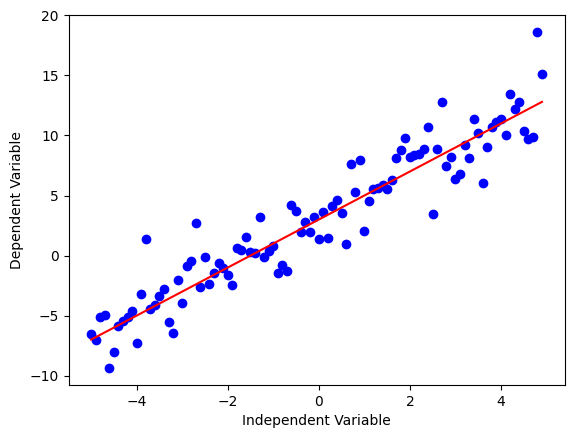

In [8]:
# linear

x = np.arange(-5.0, 5.0, 0.1) # the x range

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3 # custom formula
y_noise = 2 * np.random.normal(size=x.size) # normal form
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

 $$ \ y = a x^3 + b x^2 + c x + d \ $$

Text(0.5, 0, 'Independent Variable')

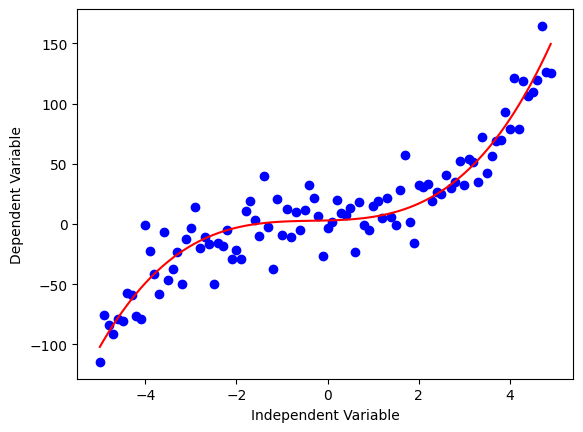

In [12]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

### Quadratic

$$ Y = X^2 $$


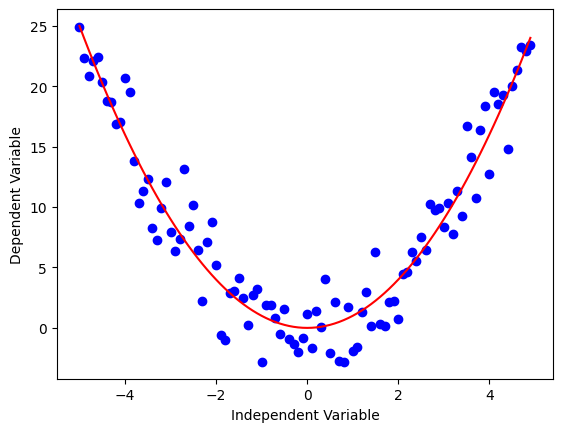

In [13]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Exponential
$$ Y = a + b c^X$$

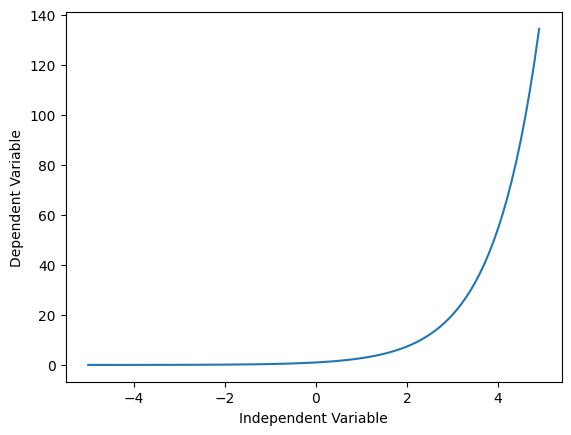

In [14]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Logarithmic

$$ y = \log(x)$$

C:\Users\m.morovati.MOROVATI-PC\AppData\Local\Temp\ipykernel_14140\441625807.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


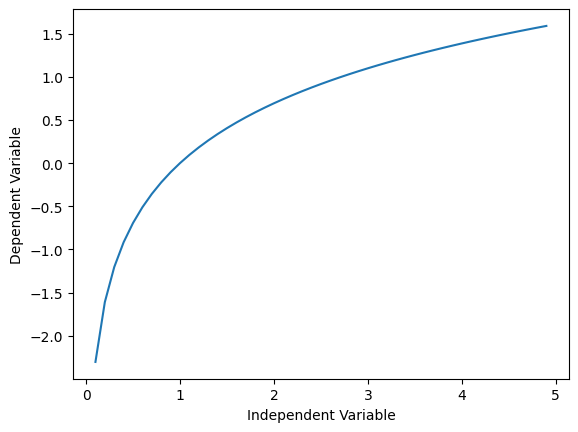

In [15]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


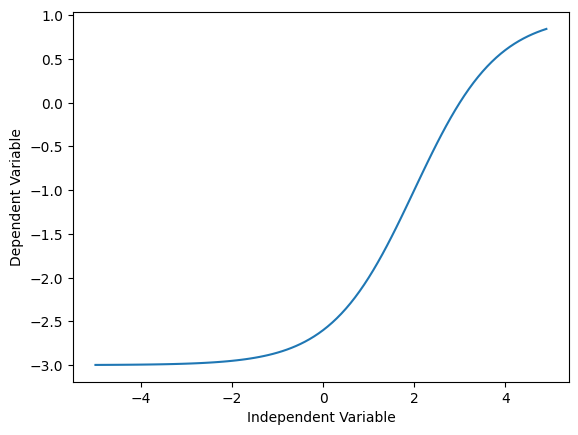

In [16]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


# Non-Linear Regression example


In [18]:
import numpy as np
import pandas as pd

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Text(0.5, 0, 'Year')

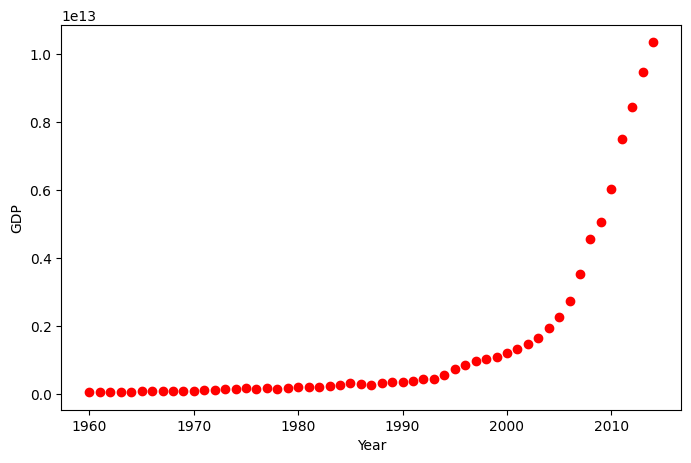

In [20]:
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)

plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')

### Choosing a model

From an initial look at the plot, we determine that the **logistic** function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


Text(0.5, 0, 'Independent Variable')

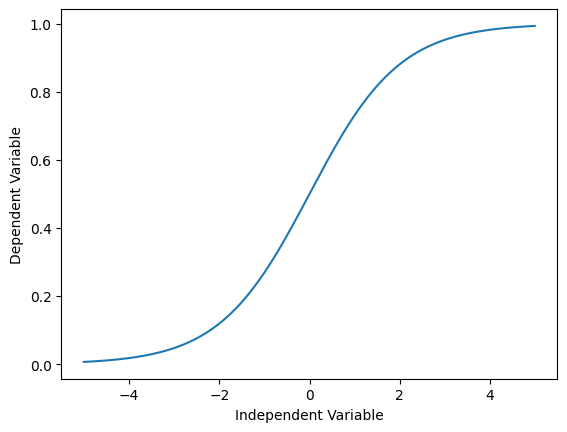

In [21]:
X = np.arange(-5.0, 5.0, .01)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')


The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.


### Building The Model

Now, let's build our regression model and initialize its parameters.


In [22]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:


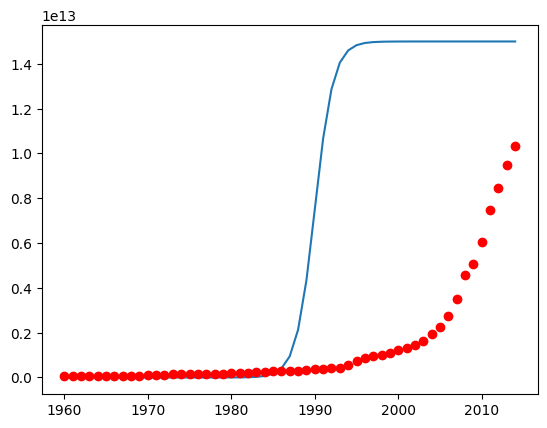

In [24]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:


In [26]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
xdata

array([0.97318769, 0.97368421, 0.97418073, 0.97467726, 0.97517378,
       0.97567031, 0.97616683, 0.97666336, 0.97715988, 0.97765641,
       0.97815293, 0.97864945, 0.97914598, 0.9796425 , 0.98013903,
       0.98063555, 0.98113208, 0.9816286 , 0.98212512, 0.98262165,
       0.98311817, 0.9836147 , 0.98411122, 0.98460775, 0.98510427,
       0.98560079, 0.98609732, 0.98659384, 0.98709037, 0.98758689,
       0.98808342, 0.98857994, 0.98907646, 0.98957299, 0.99006951,
       0.99056604, 0.99106256, 0.99155909, 0.99205561, 0.99255214,
       0.99304866, 0.99354518, 0.99404171, 0.99453823, 0.99503476,
       0.99553128, 0.99602781, 0.99652433, 0.99702085, 0.99751738,
       0.9980139 , 0.99851043, 0.99900695, 0.99950348, 1.        ])

#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.


In [27]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

# print the final parameters
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.451712, beta_2 = 0.997207


Now we plot our resulting regression model.


Text(0.5, 0, 'Year')

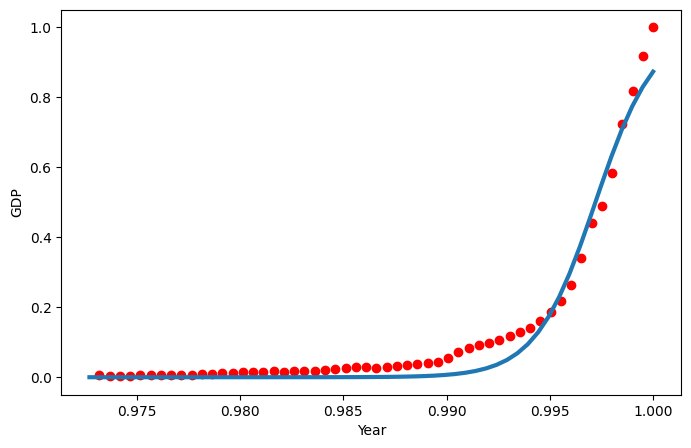

In [28]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8, 5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label = 'data')
plt.plot(x, y, linewidth = 3.0, label = 'fit')
plt.ylabel('GDP')
plt.xlabel('Year')